<a href="https://colab.research.google.com/github/mojoyinkimberly/Predicting_Electricity_Output/blob/main/Predicting_net_hourly_electrical_energy_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**loading the dataset into the python environment.**

In [ ]:
ccpp = pd.read_excel("/content/Python Presentation CPP.xlsx")
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


**renaming columns for easy identification**

In [ ]:
rename_columns = ccpp.rename(columns={"V": "Exhaust_Vacuum", "AP":"Ambient_Pressure", "RH":"Relative_Humidity", "AT":"Temperature", "PE":"Electrical_output"})

Renaming the columns for easy identification and self explainability

**Checking for missing values*

In [ ]:
rename_columns.isna().sum()

Temperature          0
Exhaust_Vacuum       0
Ambient_Pressure     0
Relative_Humidity    0
Electrical_output    0
dtype: int64

**From the result above it shows there is no missing values in our dataset**

In [ ]:
rename_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        9568 non-null   float64
 1   Exhaust_Vacuum     9568 non-null   float64
 2   Ambient_Pressure   9568 non-null   float64
 3   Relative_Humidity  9568 non-null   float64
 4   Electrical_output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


***Statistically Summary*

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(rename_columns)

In [ ]:
rename_columns.describe()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electrical_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**The describe function give us summary statistics such as the mean, the variability among variables as well as it also show the distribution of our data point in each variable that is normality of our dataset.*

**Checking for the shape of the datasets**

In [ ]:
rename_columns.shape

(9568, 5)

**Checking for correlation between dependent variable and independent variables**

Text(0.5, 1.0, 'Electrical_output  VS Relative_Humidity')

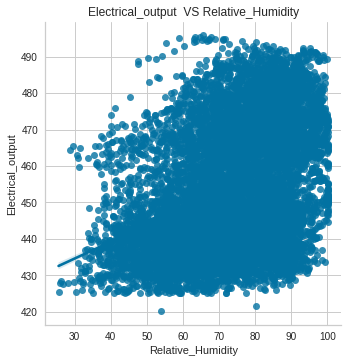

In [ ]:
fig=sns.lmplot(x='Relative_Humidity',y='Electrical_output',data=rename_columns)
plt.title("Electrical_output  VS Relative_Humidity")

Text(0.5, 1.0, 'Electrical_output  VS Ambient_Pressure')

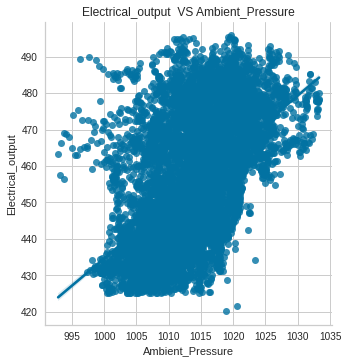

In [ ]:
fig=sns.lmplot(x='Ambient_Pressure',y='Electrical_output',data=rename_columns)
plt.title("Electrical_output  VS Ambient_Pressure")

Text(0.5, 1.0, 'Electrical_output  VS Exhaust_Vacuum\t')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


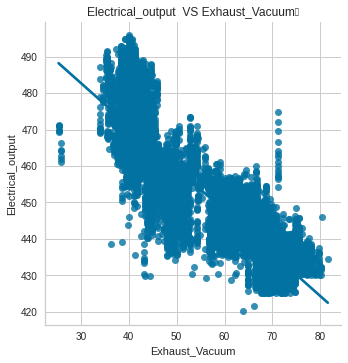

In [ ]:
fig=sns.lmplot(x='Exhaust_Vacuum',y='Electrical_output',data=rename_columns)
plt.title("Electrical_output  VS Exhaust_Vacuum	")

Text(0.5, 1.0, 'Electrical_output  VS Temperature')

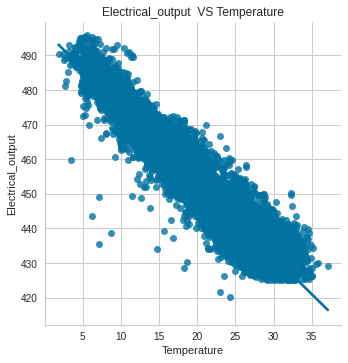

In [ ]:
fig=sns.lmplot(x='Temperature',y='Electrical_output',data=rename_columns)
plt.title("Electrical_output  VS Temperature")

**Summary of the above correlation graph shows that Ambient Pressure and Relative Humidity are positively correlated with Electricity Output while Temparature and Exhaust Vacuum are negatively correlated but since correlation is not causation there is always the need to verified it.*

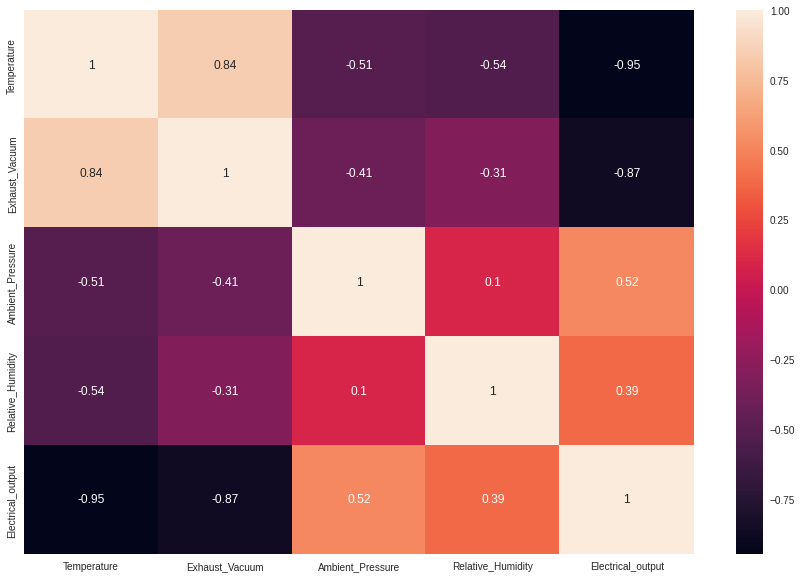

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(rename_columns.corr(), annot=True)

**In other to avoid the problem of multicollinearity there is the need to check for correlation among independent variables which tends to affect the R*2 and in the long run affect our prediction*

***splitting dataset into dependent and independent variables*

In [ ]:
y = rename_columns['Electrical_output']
x = rename_columns.drop(columns=['Electrical_output'], axis=1)

**Splitting the dataset into train and test*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45 )

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

**Depicting dimensionality reduction techniques using Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=4)
model.fit(rename_columns,x)

RandomForestRegressor(max_depth=4, random_state=1)

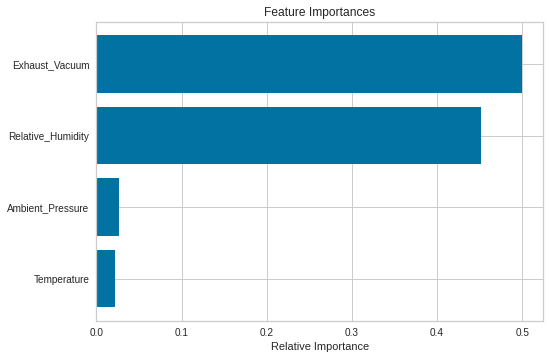

In [ ]:
features = rename_columns.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-4:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**From the above random forest graph is clear that the variables that are very important for predicting the hourly energy output are, Exhaust_Vacuum, Relative_Humidity for ambient_pressure and temparature we can also see there are important but not like the former in predicting the energy output in that case we are going to be using the four variables for our predictions*

#**Fitting the regression against the val datasets to check how the model can be able to learn from the data*

In [ ]:
model = LinearRegression()
power_output = model.fit(X_val, y_val)

#**Getting your R*2 score*

In [ ]:
coef_deter = power_output.score(X_val, y_val)
coef_deter

0.9260043425552649

In [ ]:
1 - (1-model.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.9258492966517662

**The score shows how the model was able to learn from the training dataset. It also shows variation of a dependent variable is being explained by the independent variable(s).*

In [ ]:
intercept = model.coef_
intercept

array([-1.95055325, -0.25198534,  0.04622899, -0.14211512])

**The coefficient is  measurement used to explain how much variability of our dependent variable can be explained by our independent variable*

In [ ]:
y_predict = power_output.predict(X_test)

#**Reporting RSquared Score for the validation dataset LinearRegression*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  3.6024964961104375
MSE :  19.698125660220935
R2 score :  0.9297204669493249


**Testing the model with the test dataset in other to be sure how good the model can be used to predict the energy output by comparing the train score against the test score .  Once the difference between the train and test score are not far apart it shows that the model is working, but in a case where the difference is much then there is the need to do a pre-diagnosis *

**Ridge regression*

#**Fitting Ridge regression with your validation dataset*

In [ ]:
from sklearn.linear_model import Ridge
model_ = Ridge(alpha=5)
power_output_ = model_.fit(X_val, y_val)


**Getting the R*2 score for Ridge regression**

In [ ]:
coef_deter = power_output_.score(X_val, y_val)
coef_deter

0.9260043334189099

In [ ]:
1 - (1-model_.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

0.9258492874962675

**Getting coefficient for the independent variables**

In [ ]:
intercept = model_.coef_
intercept

array([-1.95001604, -0.25218452,  0.04636695, -0.14202428])

In [ ]:
y_predict = power_output_.predict(X_test)
y_train_predict = power_output.predict(X_train)

#**Reporting RSquared Score for the validation dataset on Ridge Regression*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  3.602573424798566
MSE :  19.69871462517973
R2 score :  0.9297183656233915


#** From the two regression (LinearRegression and Ridge Regression) we can say the LinearRegression perform slightly better when compare to Ridge given that the mean absolute error of ridge 19.622 is higher than that of LinearRegression of 19.621 so am going to be working with the LinearRegression for cross validation.*

#**Hyper-Parameter Tuning*

In [ ]:
train_score = []
test_score = []

random_state = 10

for i in range(random_state):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_val, y_val, test_size = 0.30, random_state = i)

    linear_model_1 = LinearRegression()
    linear_model_1.fit(X_train1, y_train1)
    
    y_train_predict_mimax = linear_model_1.predict(X_train1)
    y_test_predict_minmax = linear_model_1.predict(X_test1)
    
    train_score = np.append(train_score, r2_score(y_train1, y_train_predict_mimax))
    test_score = np.append(test_score, r2_score(y_test1, y_test_predict_minmax))

print(X_train1.shape)
print(y_train1.shape)

(1339, 4)
(1339,)


In [ ]:
train_score

array([0.9290844 , 0.92915175, 0.92257747, 0.92599049, 0.92596764,
       0.92578885, 0.92299217, 0.92837874, 0.93033149, 0.92681636])

In [ ]:
test_score

array([0.91835844, 0.91792576, 0.93341625, 0.92577685, 0.92593144,
       0.92609677, 0.93229553, 0.92008568, 0.91531686, 0.92337247])

In [ ]:

print('R2 train: %.2f +/- %.2f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.93 +/- 0.00


In [ ]:
print('R2 train: %.2f +/- %.2f' % (np.mean(test_score),np.std(test_score)))

R2 train: 0.92 +/- 0.01


*Hyperparameters tuning are parameters estimates which improves the result of the linear regression model (Eg: increasing the percentage of train set/test set) and the variables which determine how the model is being trained Hyperparameters are set before training.**

# **Plotting Histogram*

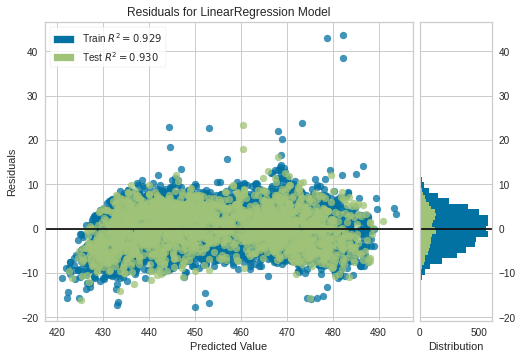

In [ ]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model, hist=True, qqplot=False)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()


**#From the grapgh above we see from the histogram that our error is normally distributed around zero, which generally indicates a well fitted model.**

In [ ]:
#From the grapgh above we see from the histogram that our error is normally distributed around zero, which generally indicates a well fitted model.

#**Train the model with the Linear Regression model since it performs better than the Ridge Regression*

In [ ]:
model = LinearRegression()
power_output = model.fit(X_train, y_train)

In [ ]:
coef_deter = power_output_.score(X_train, y_train)
coef_deter

0.9288201142319352

In [ ]:
intercept = model.coef_
intercept

array([-1.97552383, -0.23705382,  0.06442035, -0.16137902])

#**Reporting RSquared Score for the whole train dataset*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(y_test, y_predict))
print("MSE : ",mean_squared_error(y_test, y_predict))
print("R2 score : ",r2_score(y_test, y_predict))

MAE :  3.602573424798566
MSE :  19.69871462517973
R2 score :  0.9297183656233915


# From the R2 score above it shows that the variables in our regression equation can explain ~93% of the change in our output variable.*